## ToC

- [Create dataset](#Create-dataset)

- [Analyze the dataset](#Analyze-the-dataset)

In [2]:
!huggingface-cli whoami

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
locchh


## Analyze the dataset

In [2]:
from datasets import load_dataset

In [3]:
dataset_name = "nvidia_qa"
dataset = load_dataset(f"locchh/{dataset_name}")
dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'answer'],
        num_rows: 9082
    })
    validation: Dataset({
        features: ['question', 'answer'],
        num_rows: 1135
    })
    test: Dataset({
        features: ['question', 'answer'],
        num_rows: 1136
    })
})

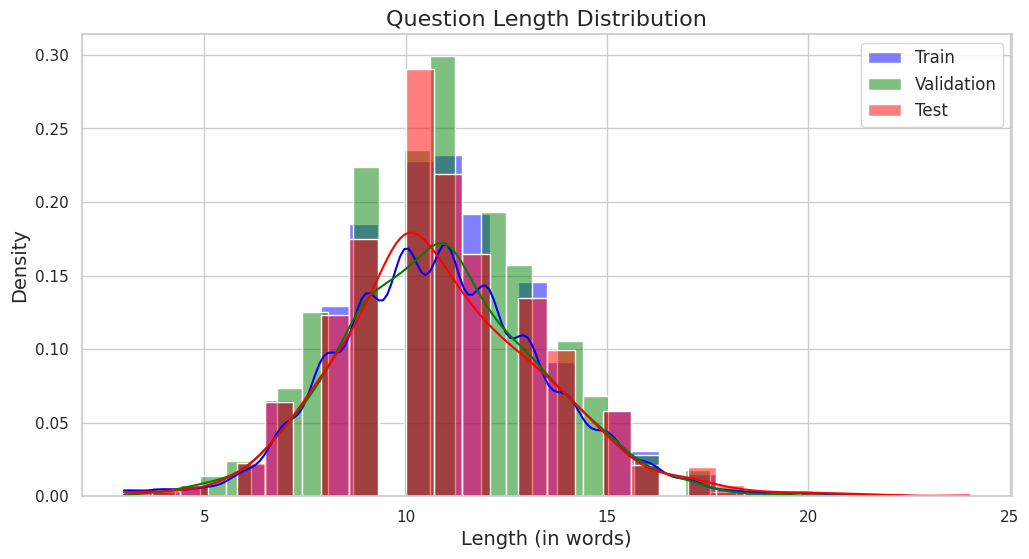

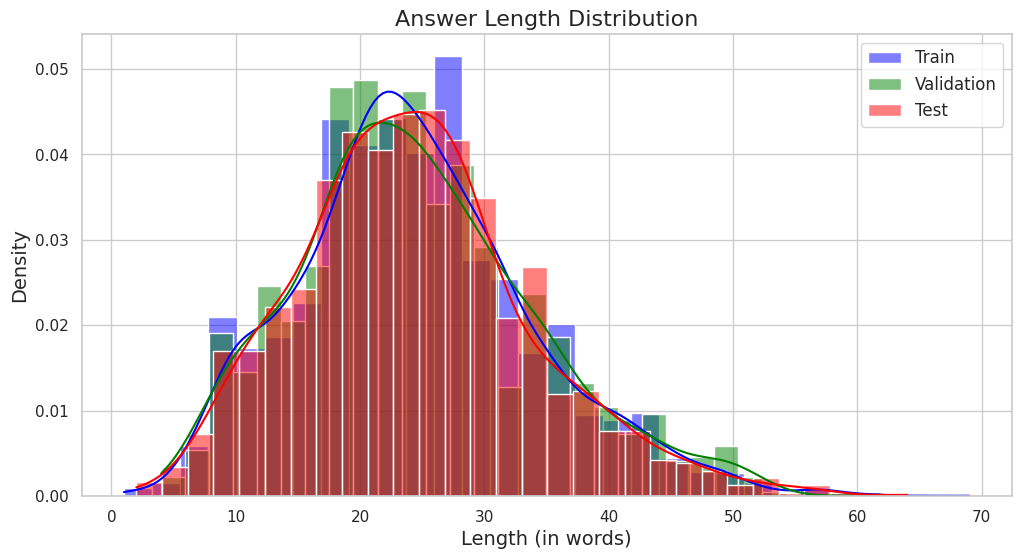

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `final_dataset` is your DatasetDict
def calculate_lengths(dataset):
    """Calculate lengths of questions and answers."""
    question_lengths = [len(q.split()) for q in dataset["question"]]
    answer_lengths = [len(a.split()) for a in dataset["answer"]]
    return question_lengths, answer_lengths

# Calculate lengths for each split
train_question_lengths, train_answer_lengths = calculate_lengths(dataset["train"])
val_question_lengths, val_answer_lengths = calculate_lengths(dataset["validation"])
test_question_lengths, test_answer_lengths = calculate_lengths(dataset["test"])

# Function to plot lengths
def plot_lengths(train, val, test, title):
    """Plot distribution of lengths."""
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.histplot(train, color="blue", label="Train", kde=True, stat="density", bins=30, alpha=0.5)
    sns.histplot(val, color="green", label="Validation", kde=True, stat="density", bins=30, alpha=0.5)
    sns.histplot(test, color="red", label="Test", kde=True, stat="density", bins=30, alpha=0.5)
    plt.title(title, fontsize=16)
    plt.xlabel("Length (in words)", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(fontsize=12)
    plt.show()

# Plot lengths for questions and answers
plot_lengths(train_question_lengths, val_question_lengths, test_question_lengths, "Question Length Distribution")
plot_lengths(train_answer_lengths, val_answer_lengths, test_answer_lengths, "Answer Length Distribution")


### Create dataset

In [11]:
import os
import re
import random
from datasets import load_dataset, Dataset, DatasetDict

In [2]:
data = {
    "question": [],
    "answer": []
}

mc_data = {
    "question": [],
    "answer": [],
    "A": [],
    "B": [],
    "C": [],
    "D": [],
}

**AI Fundamentals**

In [3]:
folder_path = "../assets/exams/"
files = os.listdir(folder_path)
file = random.choice(files)
print(file)
file_path = os.path.join(folder_path, file)

with open(file_path, "r", encoding="utf-8") as f:
    content = f.read()

if "---" in content:
    samples = content.split("---")

print(len(samples))

Lesson_12.5_Supported Cloud Service Providers and Consumption Models.md
50


In [4]:
samples[0]

'# Supported Cloud Service Providers and Consumption Models\n\n### Understanding Cloud Service Providers (CSPs)\n\n**1. What are the major cloud service providers (CSPs) mentioned in the subunit?**\n\nA. Google Cloud, AWS, Microsoft Azure, IBM Cloud  \nB. Only local data centers  \nC. Only startup companies  \nD. None of the above  \n\n**Answer:** A. Google Cloud, AWS, Microsoft Azure, IBM Cloud\n\n'

In [5]:
print(samples[1])



**2. How does NVIDIA support organizations in deploying AI workflows across different CSPs?**

A. By providing hardware solutions exclusively  
B. By offering software and tools that enhance compatibility and efficiency across various cloud environments  
C. By limiting deployments to their own cloud services  
D. By focusing solely on on-premises solutions  

**Answer:** B. By offering software and tools that enhance compatibility and efficiency across various cloud environments




Extract Multiple choices Question and Answer

In [6]:

def extract_questions_answers_and_options(content):
    # Define regex patterns for question, answer, and options
    question_pattern = re.compile(r'\*\*\d+\.\s(.+?)\*\*')  # Matches question text
    answer_pattern = re.compile(r'\*\*Answer:\*\*\s[A-D][.)]\s(.+?)\s{2,}')  # Matches answer option and text
    option_pattern = re.compile(r'([A-D])\.\s(.+?)(?=\n[A-D]\.|(?=\*\*Answer:)|$)', re.DOTALL)  # Matches each option (A, B, C, D)

    # Extract question
    question_match = question_pattern.search(content)
    question = question_match.group(1).strip() if question_match else None

    # Extract options (A, B, C, D)
    options = {match.group(1): match.group(2).strip() for match in option_pattern.finditer(content)}

    # Extract answer
    answer_match = answer_pattern.search(content)
    if answer_match:
        answer = answer_match.group(1).strip()
    else:
        answer = None

    # Validate that all options (A, B, C, D) and the question are present
    if question and answer and all(key in options for key in ['A', 'B', 'C', 'D']):
        return question, answer, options['A'], options['B'], options['C'], options['D']
    else:
        return None, None, None, None, None, None  # Return None for all if any component is missing


In [7]:
random_idx = random.choice(range(len(samples)))
question, answer, A, B, C, D = extract_questions_answers_and_options(samples[random_idx])
print("question:", question)
print("answer:", answer)
print("A:", A)
print("B:", B)
print("C:", C)
print("D:", D)

question: What role does a company’s cloud strategy play in maximizing AI benefits?
answer: A well-defined cloud strategy aligns AI initiatives with organizational goals, ensuring efficient resource allocation and improved outcomes
A: It has no impact on AI benefits
B: A well-defined cloud strategy aligns AI initiatives with organizational goals, ensuring efficient resource allocation and improved outcomes
C: Cloud strategy is only about cost savings
D: It is irrelevant to operational efficiency


In [8]:
for file in files:
    
    file_path = os.path.join(folder_path, file)

    with open(file_path, "r", encoding="utf-8") as f:
        content = f.read()


    for sample in samples:
        question, answer, A, B, C, D = extract_questions_answers_and_options(sample)
        if question and answer and A and B and C and D:
            mc_data["question"].append(question)
            mc_data["answer"].append(answer)
            mc_data["A"].append(A)
            mc_data["B"].append(B)
            mc_data["C"].append(C)
            mc_data["D"].append(D)


In [9]:
len(mc_data["question"])

1078

In [12]:
# Convert dictionary to Dataset
mc_dataset = Dataset.from_dict(mc_data)

# Shuffle the dataset
shuffled_mc_dataset = mc_dataset.shuffle(seed=42)  # Ensure reproducibility with a fixed seed

In [14]:
dataset_name = "Nvidia_AI_Infrastructure_and_Operations_Fundamentals_MCQA"
shuffled_mc_dataset.push_to_hub(dataset_name)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/locchh/Nvidia_AI_Infrastructure_and_Operations_Fundamentals_MCQA/commit/11241eb06cbbd422e923a0dddca17bff38be8c1b', commit_message='Upload dataset', commit_description='', oid='11241eb06cbbd422e923a0dddca17bff38be8c1b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/locchh/Nvidia_AI_Infrastructure_and_Operations_Fundamentals_MCQA', endpoint='https://huggingface.co', repo_type='dataset', repo_id='locchh/Nvidia_AI_Infrastructure_and_Operations_Fundamentals_MCQA'), pr_revision=None, pr_num=None)

Extract Question and Answer

In [8]:
def extract_questions_and_answers(content):
    # Define regex patterns for questions and answers
    question_pattern = re.compile(r'\*\*\d+\.\s(.+?)\*\*')
    #answer_pattern = re.compile(r'\*\*Answer:\*\*\s[A-D]\.\s(.+?)\s{2,}')
    answer_pattern = re.compile(r'\*\*Answer:\*\*\s[A-D][.)]\s(.+?)\s{2,}')

    # Extract question and answer
    question_match = question_pattern.search(content)
    answer_match = answer_pattern.search(content)

    # Ensure both question and answer are found
    if question_match and answer_match:
        question = question_match.group(1).strip()
        answer = answer_match.group(1).strip()
        return question, answer
    else:
        return None, None  # Return None if either question or answer is not found

In [9]:
random_idx = random.choice(range(len(samples)))
question, answer = extract_questions_and_answers(samples[random_idx])
print("question:", question)
print("answer:", answer)

question: What have you learned about the components and configurations of the DGX BasePOD?
answer: They include a variety of GPUs, storage, and networking components tailored for efficient AI workloads


In [10]:
for file in files:
    
    file_path = os.path.join(folder_path, file)

    with open(file_path, "r", encoding="utf-8") as f:
        content = f.read()
    
    if "---" in content:
        samples = content.split("---")
    else:
        print(file)
        continue

    for sample in samples:
        question, answer = extract_questions_and_answers(sample)
        if question and answer:
            data["question"].append(question)
            data["answer"].append(answer)


In [11]:
len(data["question"])

1268

In [12]:
random_idx = random.choice(range(len(data["question"])))

question = data["question"][random_idx]
answer = data["answer"][random_idx]

print("question:", question)
print("answer:", answer)

question: How does generative AI contribute to healthcare advancements?
answer: By generating medical images, drug discovery simulations, and personalized treatment plans


**ajsbsd/nvidia-qa**

In [12]:
dataset_name = "ajsbsd/nvidia-qa"
nvidia_qa_dataset = load_dataset(dataset_name)
nvidia_qa_dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'question', 'answer'],
        num_rows: 7108
    })
})

In [13]:
random_idx = random.choice(range(nvidia_qa_dataset['train'].num_rows))
print(nvidia_qa_dataset['train'][random_idx]['question'],"\n")
print(nvidia_qa_dataset['train'][random_idx]['answer'])

How does the CUDA programming model handle increasing numbers of processor cores? 

The CUDA programming model scales parallelism by dividing problems into smaller tasks and executing them independently using CUDA blocks, effectively leveraging increasing processor core counts.


In [14]:
for i in range(nvidia_qa_dataset['train'].num_rows):
    sample = nvidia_qa_dataset['train'][i]
    data['question'].append(sample['question'])
    data['answer'].append(sample['answer'])

**arunima29/nvidia_qa_formatted**

In [64]:
dataset_name = "arunima29/nvidia_qa_formatted"
nvidia_qa_formatted_dataset = load_dataset(dataset_name)
nvidia_qa_formatted_dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 2977
    })
})

In [65]:
random_idx = random.choice(range(nvidia_qa_formatted_dataset['train'].num_rows))
nvidia_qa_formatted_dataset['train'][random_idx]['text']

"Instruction:\nHow does the __restrict__ keyword impact code using the GPU's read-only data cache?\n\nResponse:\nOn GPUs with a read-only data cache, using the __restrict__ keyword allows the compiler to determine that a pointer references read-only data. This enables the compiler to utilize the read-only data cache more effectively, potentially improving data access performance in kernels.\n"

In [66]:
def preprocess_text(input_text):
    """
    Extracts the question (Instruction) and answer (Response) from the input text.

    Args:
        input_text (str): The text containing Instruction and Response sections.

    Returns:
        dict: A dictionary with keys 'question' and 'answer'.
    """
    # Define patterns to extract Instruction and Response
    instruction_pattern = r"Instruction:\n(.*?)\n\nResponse:"
    response_pattern = r"Response:\n(.*)"

    # Extract Instruction (question)
    question_match = re.search(instruction_pattern, input_text, re.DOTALL)
    question = question_match.group(1).strip() if question_match else None

    # Extract Response (answer)
    answer_match = re.search(response_pattern, input_text, re.DOTALL)
    answer = answer_match.group(1).strip() if answer_match else None

    return question,answer

# Example usage
input_text = """Instruction:\nWhat function wrappers are mentioned for GPU programming in MATLAB?\n\nResponse:\nFunction wrappers like bsxfun, pagefun, and arrayfun are mentioned for GPU programming in MATLAB.\n"""

question, answer = preprocess_text(input_text)

print("question:", question)
print("answer:", answer)

question: What function wrappers are mentioned for GPU programming in MATLAB?
answer: Function wrappers like bsxfun, pagefun, and arrayfun are mentioned for GPU programming in MATLAB.


In [67]:
for i in range(nvidia_qa_formatted_dataset['train'].num_rows):
    sample = nvidia_qa_formatted_dataset['train'][i]
    question, answer = preprocess_text(sample['text'])
    data['question'].append(question)
    data['answer'].append(answer)

In [68]:
len(data['question'])

11353

In [107]:
random_idx = random.choice(range(len(data["question"])))

question = data["question"][random_idx]
answer = data["answer"][random_idx]

print("question:", question)
print("answer:", answer)

question: How can ongoing monitoring influence the success of AI projects?
answer: By enabling timely detection of issues, ensuring optimal resource utilization, and maintaining project alignment with goals.


In [110]:
from datasets import Dataset, DatasetDict

# Convert dictionary to Dataset
dataset = Dataset.from_dict(data)

# Shuffle the dataset
shuffled_dataset = dataset.shuffle(seed=42)  # Ensure reproducibility with a fixed seed

# Split into train (80%), validation (10%), and test (10%)
train_test_split = shuffled_dataset.train_test_split(test_size=0.2, seed=42)
test_val_split = train_test_split["test"].train_test_split(test_size=0.5, seed=42)

# Combine into a DatasetDict
final_dataset = DatasetDict({
    "train": train_test_split["train"],
    "validation": test_val_split["train"],
    "test": test_val_split["test"]
})

In [111]:
final_dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'answer'],
        num_rows: 9082
    })
    validation: Dataset({
        features: ['question', 'answer'],
        num_rows: 1135
    })
    test: Dataset({
        features: ['question', 'answer'],
        num_rows: 1136
    })
})

In [113]:
dataset_name = "nvidia_qa"

# Push to Hugging Face Hub
final_dataset.push_to_hub(dataset_name)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/locchh/nvidia_qa/commit/8816a060e62a5f0b0a4941b4dc7fa25ed6d52dbf', commit_message='Upload dataset', commit_description='', oid='8816a060e62a5f0b0a4941b4dc7fa25ed6d52dbf', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/locchh/nvidia_qa', endpoint='https://huggingface.co', repo_type='dataset', repo_id='locchh/nvidia_qa'), pr_revision=None, pr_num=None)